In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('seaborn')

warnings.filterwarnings(action='ignore')

In [2]:
# load the data
p = pd.read_csv('products.csv')
d = pd.read_csv('departments.csv')
a = pd.read_csv('aisles.csv')

In [3]:
# right join to merge the dataframes on department and aisle id
catalog = pd.merge(p, d,
                   how='right', on='department_id')
catalog = pd.merge(catalog, a,
                   how='right', on='aisle_id')
catalog.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [4]:
# create dataframe with prior purchasing history
orders = pd.read_csv('orders.csv')
X = pd.read_csv('order_products__prior.csv')

# left join with catalog data
X = pd.merge(X, orders,
                 how='left', on='order_id')
X = pd.merge(X, catalog,
                 how='left', on='product_id')
X.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,pantry,baking ingredients


In [5]:
# downsample the original datasets to 1 million records
X = X.iloc[0:1000000,]

In [6]:
# replace null values with 0
X.replace(np.NaN, 0, inplace=True)

In [7]:
# convert days_since_prior_order to integer first
X['days_since_prior_order'] = X['days_since_prior_order'].astype(int)

# convert integers to categorical variables
int_to_cat = ['product_id', 'reordered', 'order_dow', 
              'order_hour_of_day', 'aisle_id', 'department_id',
              'days_since_prior_order']

for var in int_to_cat:
    X[var] = X[var].astype('str')

# drop unnecessary variables
X.drop(['user_id', 'eval_set'], axis=1, inplace=True)

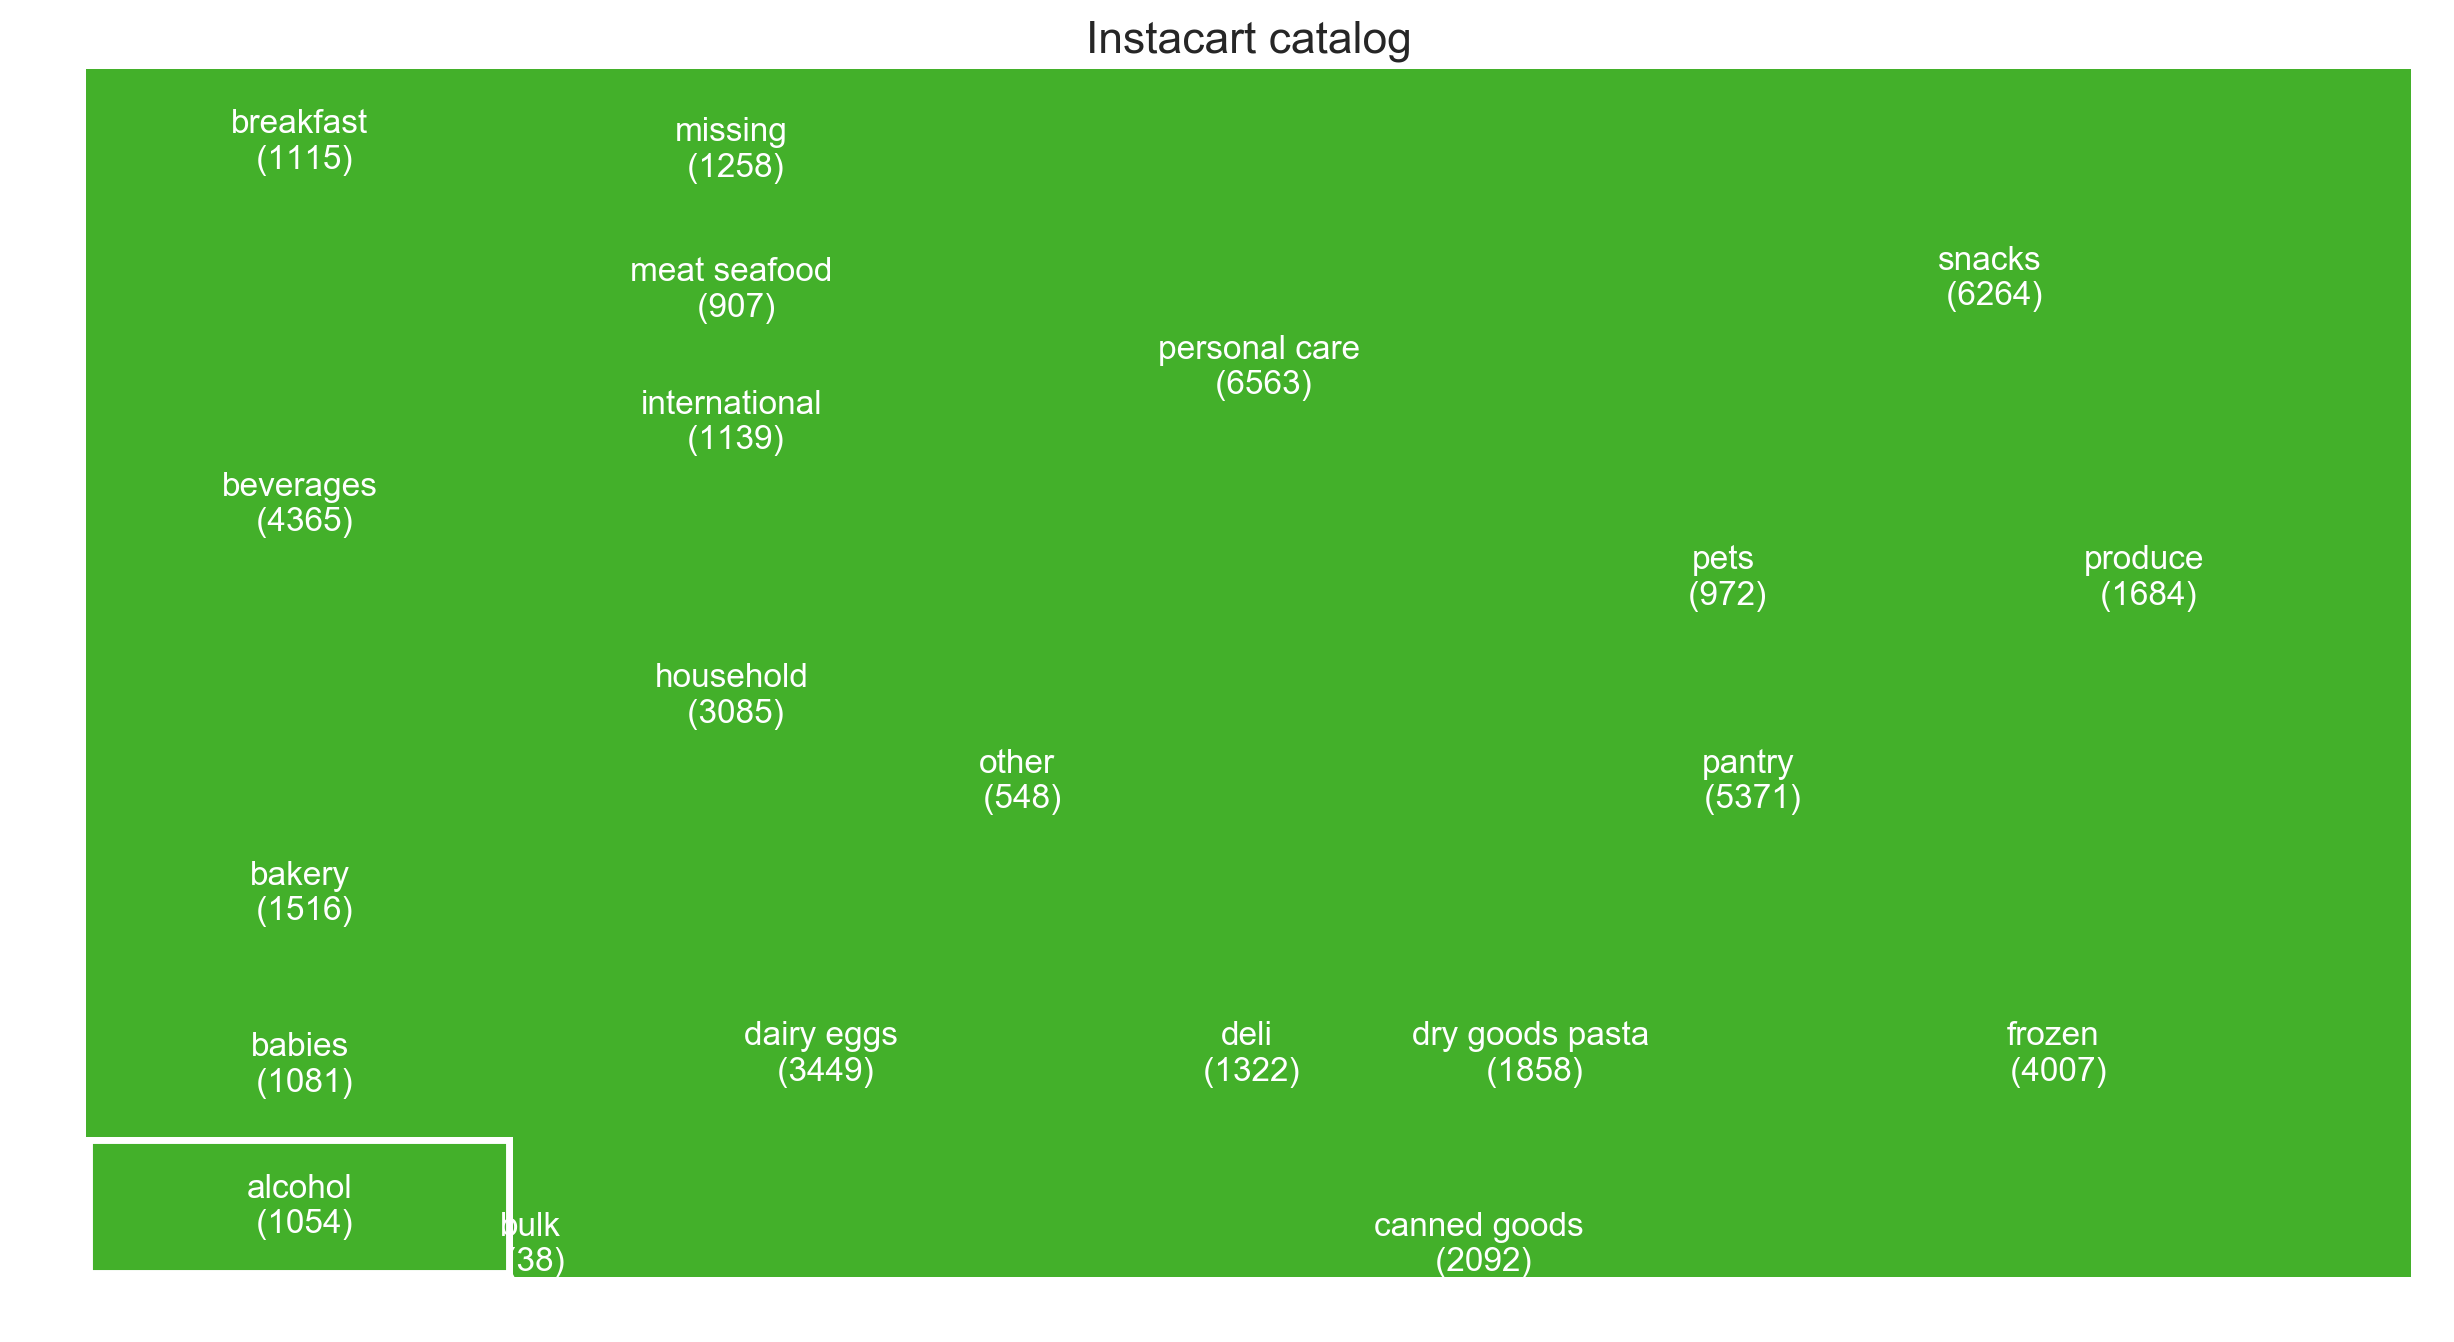

In [8]:
# import squarify to create a treemap
import squarify
import matplotlib

# get number of products in each department
x1 = (catalog.groupby(['department'])
      .count()
      .reset_index())

# generate labels with number of products in each department
labels = x1.apply(lambda x: str(x[0]) + '\n (' + str(x[1]) + ')', axis=1)

# create plot
plt.figure(figsize=(15, 8), dpi=200)

# plot data and add padding around squares for better visualization
squarify.plot(label=labels, sizes=x1.product_id, color='#43B02A',
              text_kwargs={'fontsize':'large', 'color':'white'},
              bar_kwargs={'edgecolor': 'w', 'linewidth':5})
plt.title('Instacart catalog', fontsize=16)

# remove axes and display plot
plt.axis('off')
plt.show()

Text(0,0.5,'Number of purchases')

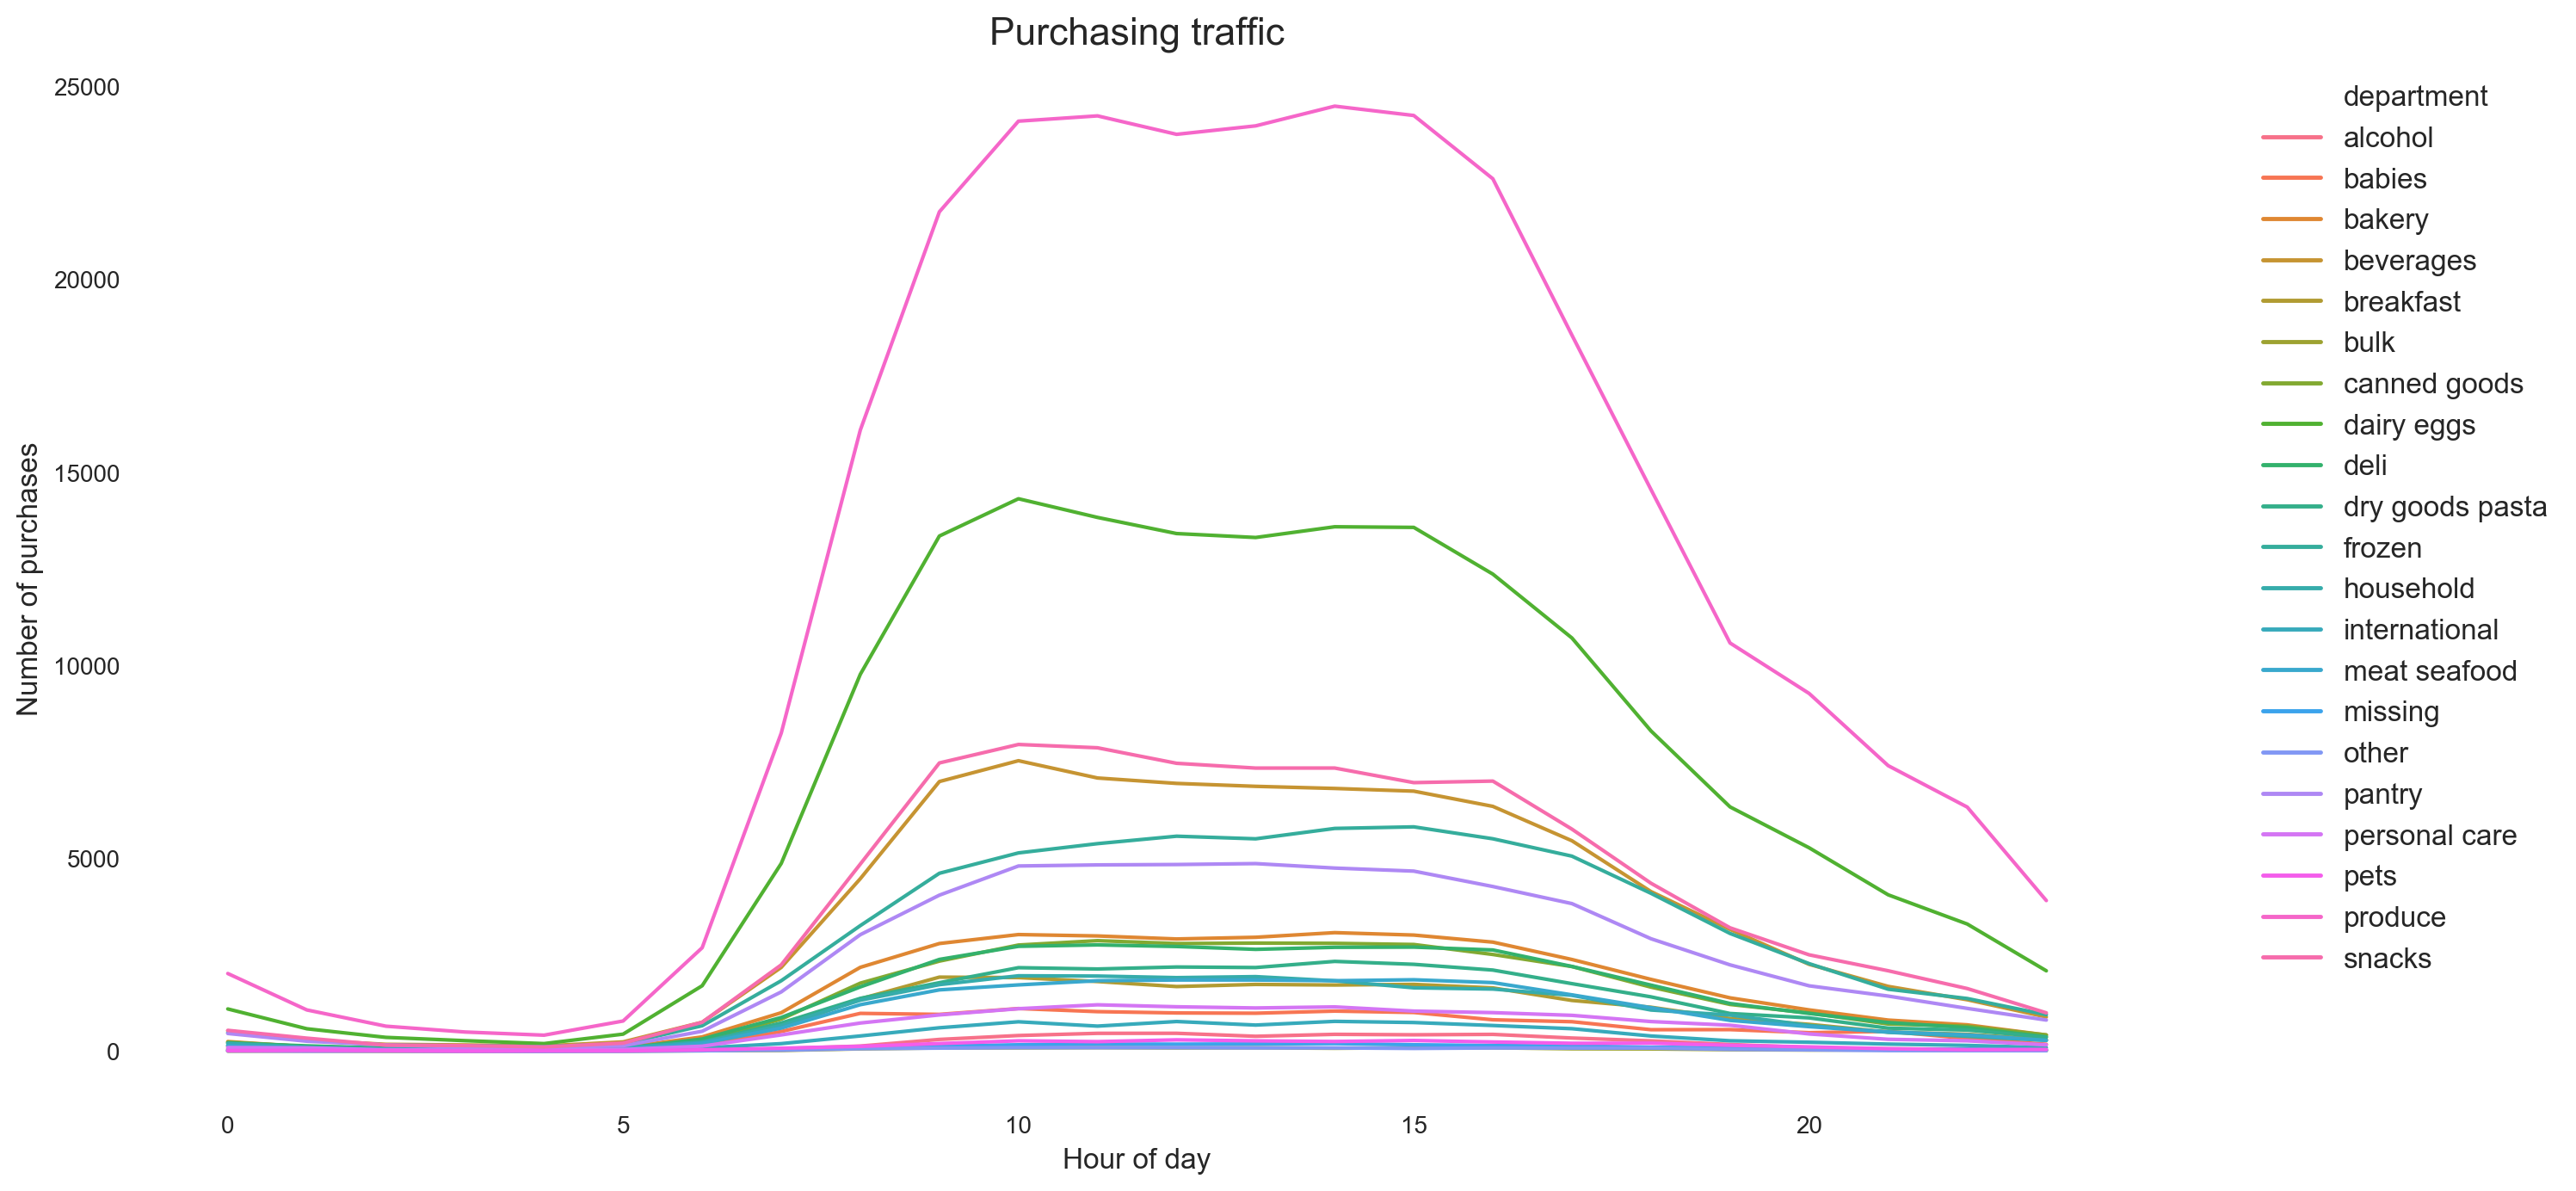

In [9]:
# create dataframe for number of orders per hour of day for each department
x2 = (X.groupby(['department', 'order_hour_of_day'])
      .count()
      .reset_index())

# manipulate dataframe to keep only department name, order hour of day and number of orders
x2 = (x2.loc[:,'department':'order_id']
     .rename(columns={'order_id':'number_of_orders'}))

x2.order_hour_of_day = x2.order_hour_of_day.astype('int')

# create plot
sns.set_style('white')
plt.figure(figsize=(15, 8), dpi=200)

# plot data
sns.lineplot(x='order_hour_of_day', y='number_of_orders',  
             hue='department', linewidth=1.5, data=x2)

# set legend outside the plot             
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=12)
plt.title('Purchasing traffic', fontsize=16)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Number of purchases', fontsize=12)

In [12]:
# # drop redundant variables
drop = ['product_name', 'department', 'aisle', 'order_id']

[X.drop(x, axis=1, inplace=True) for x in drop]

# create feature and target variables
y = X['reordered']
X = X.drop('reordered', axis=1)

# encode categorical features
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

enc = OneHotEncoder()
X = enc.fit_transform(X)
y = to_categorical(y)


In [ ]:
orders %>% 
  ggplot(aes(x=order_hour_of_day)) + 
  geom_histogram(stat="count",fill="red")